In [1]:
import tensorflow as tf 

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np
from label_datagenerator import DataGenerator 

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

validation_images, validation_labels = train_images[:len(train_images) // 10 * 3], train_labels[:len(train_labels) // 10 * 3]

train_images, train_labels = train_images[len(train_images) // 10 * 7:], train_labels[len(train_labels) // 10 * 7:]

train_data = DataGenerator(train_images, train_labels)
validation_data = DataGenerator(validation_images, validation_labels, shuffle=False, data_aug=False)
test_data = DataGenerator(test_images, test_labels, shuffle=False, data_aug=False)


<function matplotlib.pyplot.show(close=None, block=None)>

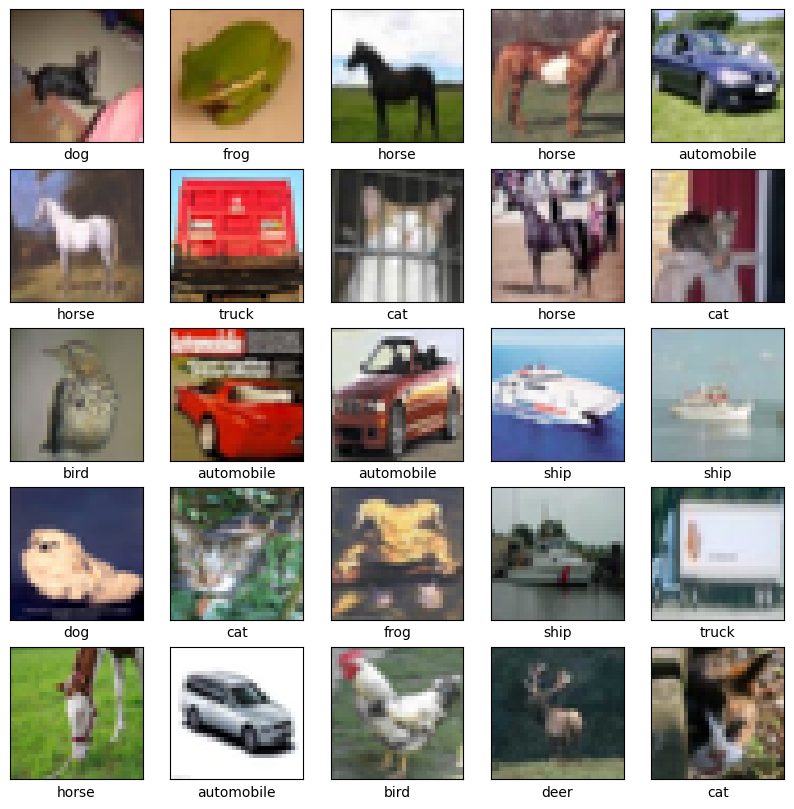

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
model.compile(optimizer = 'adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics = ['accuracy'])

history = model.fit(train_data, epochs = 10, 
                    validation_data = (validation_data))

Epoch 1/10
468/468 [==============================] - 15s 31ms/step - loss: 1.1031 - accuracy: 0.6161 - val_loss: 1.4039 - val_accuracy: 0.5242
Epoch 2/10
468/468 [==============================] - 16s 34ms/step - loss: 1.0323 - accuracy: 0.6362 - val_loss: 1.2614 - val_accuracy: 0.5669
Epoch 3/10
468/468 [==============================] - 16s 35ms/step - loss: 0.9761 - accuracy: 0.6575 - val_loss: 1.2592 - val_accuracy: 0.5658
Epoch 4/10
468/468 [==============================] - 16s 35ms/step - loss: 0.9156 - accuracy: 0.6770 - val_loss: 1.2566 - val_accuracy: 0.5772
Epoch 5/10
468/468 [==============================] - 14s 31ms/step - loss: 0.8493 - accuracy: 0.7045 - val_loss: 1.2614 - val_accuracy: 0.5815
Epoch 6/10
468/468 [==============================] - 15s 33ms/step - loss: 0.8005 - accuracy: 0.7201 - val_loss: 1.2679 - val_accuracy: 0.5807
Epoch 7/10
468/468 [==============================] - 15s 33ms/step - loss: 0.7377 - accuracy: 0.7411 - val_loss: 1.2907 - val_accuracy:

313/313 - 0s - loss: 1.4248 - accuracy: 0.5890 - 482ms/epoch - 2ms/step


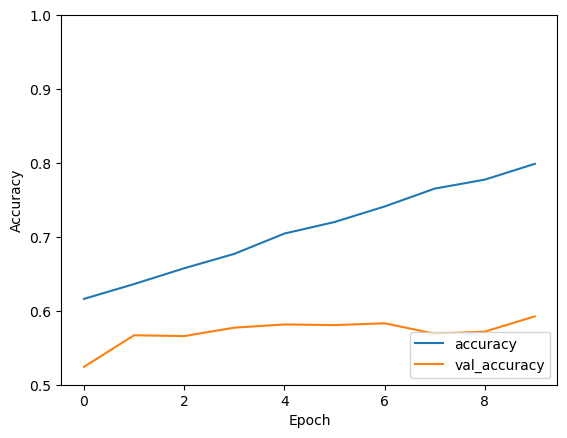

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [17]:
print(test_acc)

0.5889999866485596


In [18]:
y_pred = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


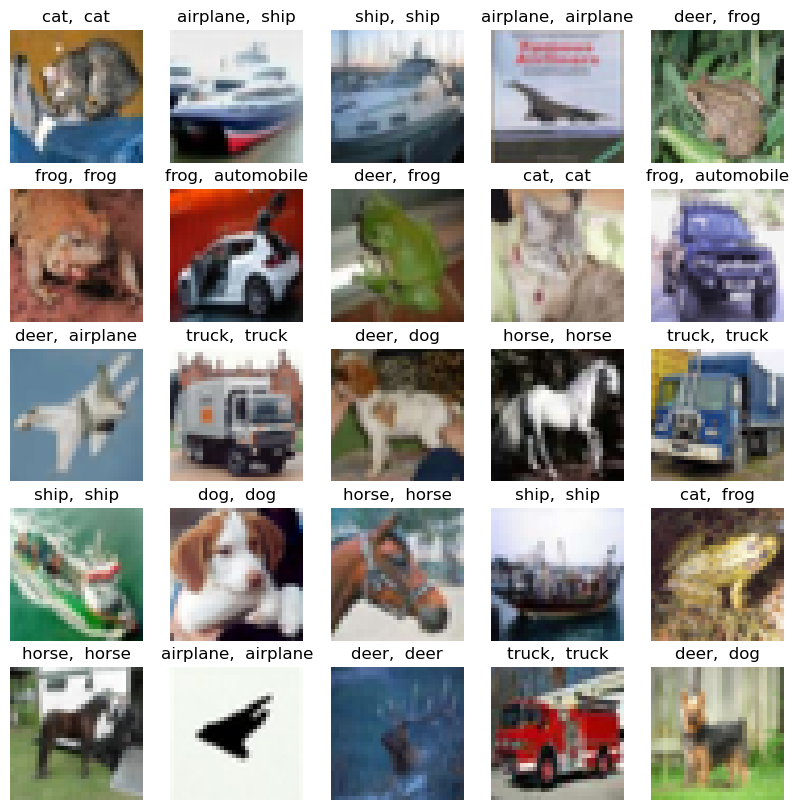

In [19]:

# Display the results
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f'{class_names[np.argmax(y_pred[i])]},  {class_names[test_labels[i][0]]}')
    plt.axis('off')
plt.show()